<a href="https://colab.research.google.com/github/ANGELA-NYUTU/PREDICTION-MODELS-HYPOTHYROID-CASES/blob/main/Moringa_Data_Science_Core_WEEK_8_Independent_Project_2021_10_Angela_Nyutu_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PREDICTING HYPOTHYRODISM IN PATIENTS**

## **Objective:**
To build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid 

## **Context**
Hypothyroidism's deficiency of thyroid hormones can disrupt such things as heart rate, body temperature and all aspects of metabolism. Hypothyroidism is most prevalent in older women.

Major symptoms include fatigue, cold sensitivity, constipation, dry skin and unexplained weight gain.
Treatment consists of thyroid hormone replacement.

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients.

## **Metric for Success**
Develop a suitable model to predict hypothyrodism cases with an accuracy of atleast 90% which is acceptable as hypothyroidism mortality rate is 50% in comorbidity cases.


## **Experimental Design**

Several experimental designs will be used i.e.:

a.Exploratory data analysis

b.Decison trees for classification analysis with several models

## **Dataset Loading and Preview**

### **Importing Libraries**

In [383]:
#Reading libraries
import pandas as pd
import numpy as np

#plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz,plot_tree
import graphviz

# Decision trees libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC,LinearSVC
# Splitting Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#Accuracy Checking Libraries
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.model_selection import cross_val_score


### **Loading the Dataset**

In [193]:
hypothyroidism_df=pd.read_csv('/content/hypothyroid.csv')

**Dataset Preview**

Top of the dataframe

In [194]:
hypothyroidism_df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


Bottom of the Dataframe

In [195]:
hypothyroidism_df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


Size

In [196]:
#Checking for the shape of the dataframe
print('The dataset has'+ str (hypothyroidism_df.columns.shape)+'columns and' +str (hypothyroidism_df.index.shape) +'rows')

The dataset has(26,)columns and(3163,)rows


Data Types

In [197]:
#Checking for data types
hypothyroidism_df.dtypes
#It appears that the dataframe has got only numerical data.

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

Columns

In [198]:
#Viewing the column names in the dataframe
hypothyroidism_df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

## **Dataset Cleaning**

**Missing Values**

In [199]:
#Checking for missing values
hypothyroidism_df.isnull().any()
#There are none missing values

status                       False
age                          False
sex                          False
on_thyroxine                 False
query_on_thyroxine           False
on_antithyroid_medication    False
thyroid_surgery              False
query_hypothyroid            False
query_hyperthyroid           False
pregnant                     False
sick                         False
tumor                        False
lithium                      False
goitre                       False
TSH_measured                 False
TSH                          False
T3_measured                  False
T3                           False
TT4_measured                 False
TT4                          False
T4U_measured                 False
T4U                          False
FTI_measured                 False
FTI                          False
TBG_measured                 False
TBG                          False
dtype: bool

**Duplicated Values**

In [200]:
#checking if the dataset has duplicated values. If present, duplicates will be dropped
hypothyroidism_df.duplicated().sum()

77

In [201]:
#Dropping duplicates
hypothyroidism_df.drop_duplicates(inplace=True)

**Modifying columns names**

In [202]:
#Tyding up the column names
hypothyroidism_df.columns = hypothyroidism_df.columns.str.strip().str.upper().str.replace(' ', '_')

In [203]:
#checking column names
hypothyroidism_df.columns

Index(['STATUS', 'AGE', 'SEX', 'ON_THYROXINE', 'QUERY_ON_THYROXINE',
       'ON_ANTITHYROID_MEDICATION', 'THYROID_SURGERY', 'QUERY_HYPOTHYROID',
       'QUERY_HYPERTHYROID', 'PREGNANT', 'SICK', 'TUMOR', 'LITHIUM', 'GOITRE',
       'TSH_MEASURED', 'TSH', 'T3_MEASURED', 'T3', 'TT4_MEASURED', 'TT4',
       'T4U_MEASURED', 'T4U', 'FTI_MEASURED', 'FTI', 'TBG_MEASURED', 'TBG'],
      dtype='object')

**Dropping unnecessary columns**

In [204]:
hypothyroidism_df['TBG'].value_counts()
#the TBG column will be dropped due to many missing values denoted by '?' i.e. 2903 values are missing
hypothyroidism_df.drop('TBG', axis=1,inplace=True)

**Dropping rows with epmty values denoted with '?'**

In [205]:
#col1=['STATUS','SEX', 'ON_THYROXINE', 'QUERY_ON_THYROXINE','ON_ANTITHYROID_MEDICATION', 'THYROID_SURGERY', 'QUERY_HYPOTHYROID','QUERY_HYPERTHYROID', 'PREGNANT', 'SICK', 'TUMOR', 'LITHIUM', 'GOITRE','TSH_MEASURED', 'T3_MEASURED','TT4_MEASURED','T4U_MEASURED', 'FTI_MEASURED','TBG_MEASURED']
#for i in hypothyroidism_df[col1]:
#  hypothyroidism_df[hypothyroidism_df[i] == '?']='Unknown'

In [206]:
for i in hypothyroidism_df.columns:
  hypothyroidism_df= hypothyroidism_df[hypothyroidism_df[i] != '?']


In [207]:
#Checkig the shape
hypothyroidism_df.shape

(1946, 25)

**Correcting data  types**

In [208]:
num=hypothyroidism_df[['AGE','TSH','T3','TT4','T4U', 'FTI']].astype(str).astype(float)
hypothyroidism_df[['AGE','TSH','T3','TT4','T4U', 'FTI']]=num

##**Exploratory Data Analysis**

### **Univariate Analysis**

In [209]:
#Descibing the columns
hypothyroidism_df['SEX'].mode()

0    F
dtype: object

In [210]:
hypothyroidism_df['AGE'].mean()

53.58478931140802

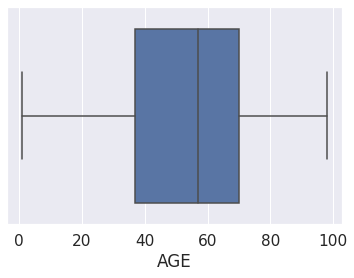

In [211]:
ax=sns.boxplot(x=hypothyroidism_df['AGE'])

In [218]:
def pie(df,column):
  data=df[column].value_counts()
  sns.set(font_scale=1.4)
  plt.figure(figsize=(7,6))
  pie=data.plot.pie(autopct='%.1f%%',labels=(df[column].unique()),startangle=0)
  plt.axis('equal')
  plt.title=(f'{column}'" DISTRIBUTION")
  plt.show()
  return plt.show()

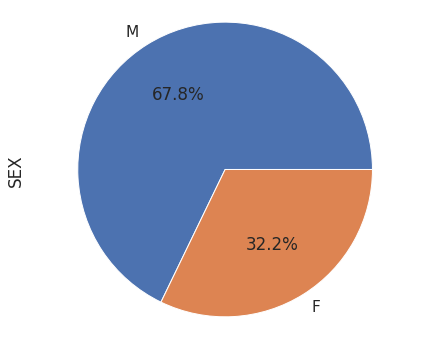

In [220]:
pie(hypothyroidism_df,'SEX')

67.8% of the respondents were male while 32.2% were women

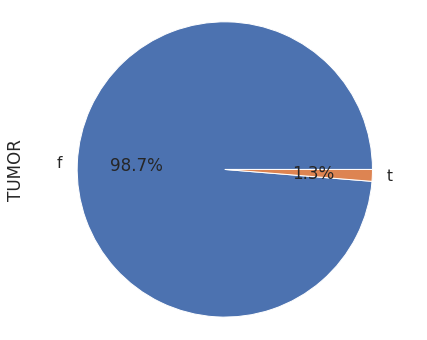

In [221]:
pie(hypothyroidism_df,'TUMOR')

98.7% respondents hsd no tumor

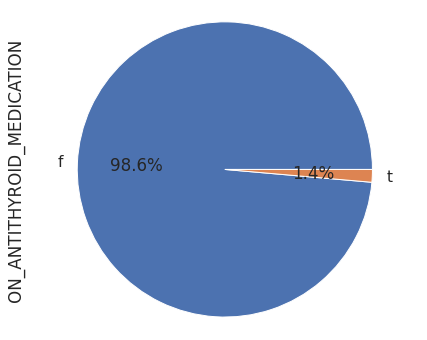

In [222]:
pie(hypothyroidism_df,'ON_ANTITHYROID_MEDICATION')

98.6% respondents were not on antithyroid medication

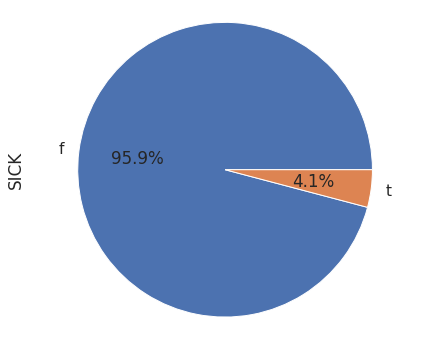

In [223]:
pie(hypothyroidism_df,'SICK')

only 4.1% of the respondents were sick at the time

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


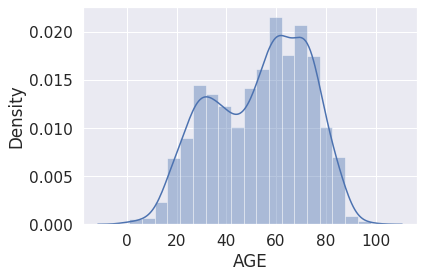

In [224]:
sns.distplot(hypothyroidism_df['AGE'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


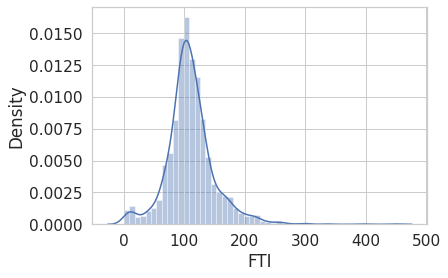

In [430]:
sns.distplot(hypothyroidism_df['FTI'])
plt.show()
#FTI test results are normaly distributed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


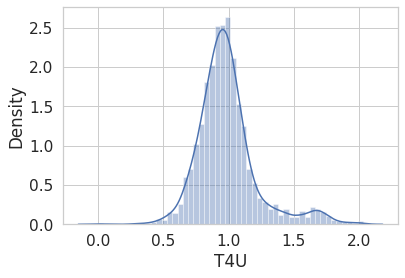

In [432]:
sns.distplot(hypothyroidism_df['T4U'])
plt.show()
#T4U test results are normaly distributed

Age of the respondents is not normaly distributed

### **Bivariate Analysis**

In [225]:
def visual(df,var1,var2):
  viz=df.groupby([var1,var2])[var2].count().unstack().plot(figsize=(10,7),color=['green','blue','orange'],kind= 'bar')
  return viz

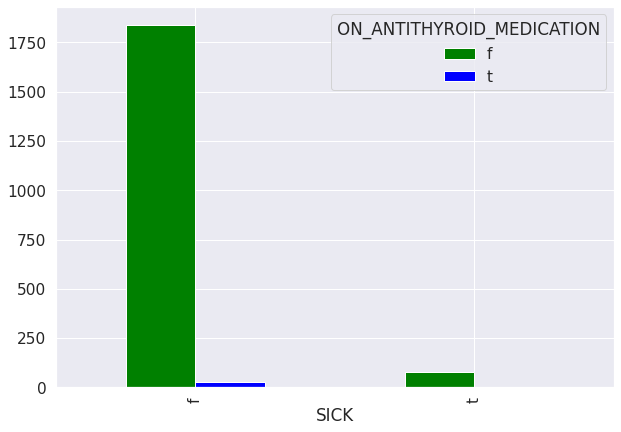

In [226]:
visual(hypothyroidism_df,'SICK','ON_ANTITHYROID_MEDICATION')

In [434]:
def viZ(df,var1,var2):
  viz=df.groupby([var1,var2])[var2].count().unstack().plot(figsize=(10,7),color=['green','blue','orange'])
  return viz

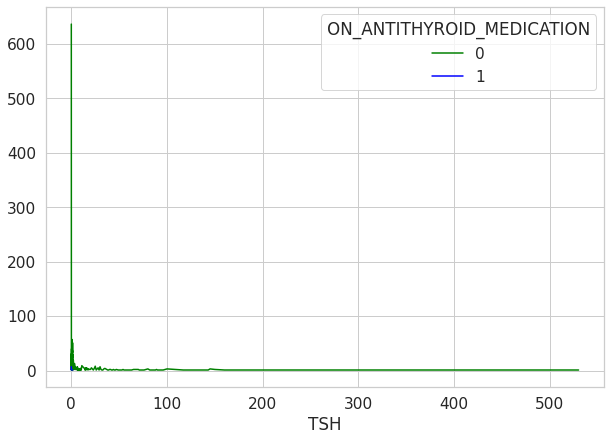

In [439]:
viZ(hypothyroidism_df,'TSH','ON_ANTITHYROID_MEDICATION')

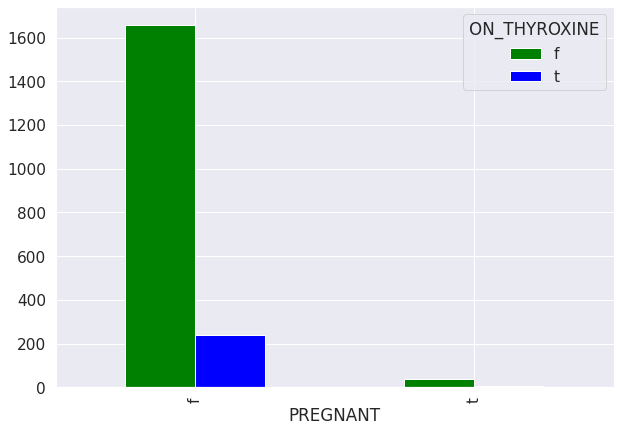

In [229]:
visual(hypothyroidism_df,'PREGNANT','ON_THYROXINE')

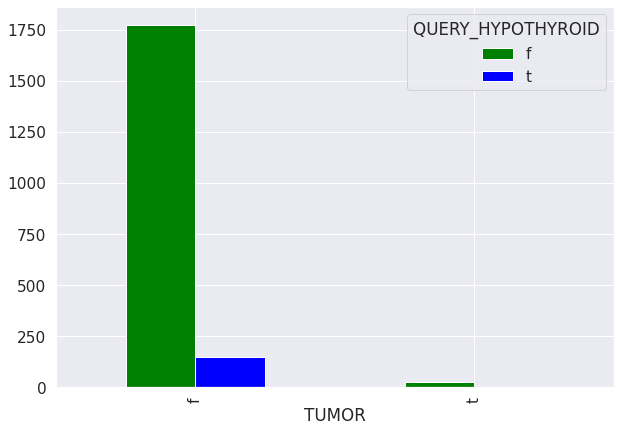

In [230]:
visual(hypothyroidism_df,'TUMOR','QUERY_HYPOTHYROID')

### **Multivariate Analysis**

In [231]:
hypothyroidism_df.corr()

,AGE,TSH,T3,TT4,T4U,FTI
AGE,1.000000,-0.002758,-0.340214,-0.119130,-0.242962,0.030210
TSH,-0.002758,1.000000,-0.188139,-0.327163,0.058965,-0.378382
T3,-0.340214,-0.188139,1.000000,0.580542,0.499923,0.316124
TT4,-0.119130,-0.327163,0.580542,1.000000,0.423904,0.802290
T4U,-0.242962,0.058965,0.499923,0.423904,1.000000,-0.148000
FTI,0.030210,-0.378382,0.316124,0.802290,-0.148000,1.000000


## **Decision Trees: Optimized**

### **Data Preparation**

**Label encoding**

In [232]:
hypothyroidism_df.head(3)

,STATUS,AGE,SEX,ON_THYROXINE,QUERY_ON_THYROXINE,ON_ANTITHYROID_MEDICATION,THYROID_SURGERY,QUERY_HYPOTHYROID,QUERY_HYPERTHYROID,PREGNANT,SICK,TUMOR,LITHIUM,GOITRE,TSH_MEASURED,TSH,T3_MEASURED,T3,TT4_MEASURED,TT4,T4U_MEASURED,T4U,FTI_MEASURED,FTI,TBG_MEASURED
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n


In [233]:
#hypothyroidism_df['SEX']=hypothyroidism_df.SEX.map({'M':0,'F':1})

In [331]:

column=['STATUS', 'SEX', 'ON_THYROXINE', 'QUERY_ON_THYROXINE',
       'ON_ANTITHYROID_MEDICATION', 'THYROID_SURGERY', 'QUERY_HYPOTHYROID',
       'QUERY_HYPERTHYROID', 'PREGNANT', 'SICK', 'TUMOR', 'LITHIUM', 'GOITRE',
       'TSH_MEASURED', 'T3_MEASURED', 'TT4_MEASURED',
       'T4U_MEASURED', 'FTI_MEASURED', 'TBG_MEASURED']
for i in column:
  hypothyroidism_df[i]=hypothyroidism_df[i].astype('category')
  hypothyroidism_df[i] = hypothyroidism_df[i].cat.codes
  

In [330]:
hypothyroidism_df.head(10)

,STATUS,AGE,SEX,ON_THYROXINE,QUERY_ON_THYROXINE,ON_ANTITHYROID_MEDICATION,THYROID_SURGERY,QUERY_HYPOTHYROID,QUERY_HYPERTHYROID,PREGNANT,SICK,TUMOR,LITHIUM,GOITRE,TSH_MEASURED,TSH,T3_MEASURED,T3,TT4_MEASURED,TT4,T4U_MEASURED,T4U,FTI_MEASURED,FTI,TBG_MEASURED
0,0,72.0,1,0,0,0,0,0,0,0,0,0,0,0,0,30.0,0,0.6,0,15.0,0,1.48,0,10.0,0
1,0,15.0,0,1,0,0,0,0,0,0,0,0,0,0,0,145.0,0,1.7,0,19.0,0,1.13,0,17.0,0
2,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.2,0,4.0,0,1.00,0,0.0,0
3,0,24.0,0,0,0,0,0,0,0,0,0,0,0,0,0,430.0,0,0.4,0,6.0,0,1.04,0,6.0,0
4,0,77.0,1,0,0,0,0,0,0,0,0,0,0,0,0,7.3,0,1.2,0,57.0,0,1.28,0,44.0,0
5,0,85.0,0,0,0,0,0,1,0,0,0,0,0,0,0,138.0,0,1.1,0,27.0,0,1.19,0,23.0,0
6,0,64.0,0,0,0,0,1,0,0,0,0,0,0,0,0,7.7,0,1.3,0,54.0,0,0.86,0,63.0,0
7,0,72.0,0,0,0,0,0,0,0,0,0,0,0,0,0,21.0,0,1.9,0,34.0,0,1.05,0,32.0,0
10,0,69.0,0,0,0,0,0,0,0,0,0,0,0,0,0,21.0,0,0.8,0,53.0,0,0.86,0,61.0,0
11,0,75.0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.0,0,1.1,0,38.0,0,0.92,0,41.0,0


**Variable Definition**

In [253]:
features=['AGE', 'SEX', 'ON_THYROXINE', 'QUERY_ON_THYROXINE',
       'ON_ANTITHYROID_MEDICATION', 'THYROID_SURGERY', 'QUERY_HYPOTHYROID',
       'QUERY_HYPERTHYROID', 'PREGNANT', 'SICK', 'TUMOR', 'LITHIUM', 'GOITRE',
       'TSH_MEASURED', 'TSH', 'T3_MEASURED', 'T3', 'TT4_MEASURED', 'TT4',
       'T4U_MEASURED', 'T4U', 'FTI_MEASURED', 'FTI', 'TBG_MEASURED']
Class=['Has Hypothyroid','Has no Hypothyroid']
x=hypothyroidism_df[features].values
y=hypothyroidism_df['STATUS']

**Dataset Splitting**

In [257]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

### **Decision Forest: Baseline**

In [269]:
dectree=DecisionTreeClassifier(criterion='entropy')
dectree.fit(xtrain,ytrain)
ypred=dectree.predict(xtest)
accuracy=metrics.accuracy_score(ytest,ypred)
print('The accuracy of the model is',str(accuracy *100),'%')

The accuracy of the model is 97.17948717948718 %


                           Importance
AGE                          0.026168
SEX                          0.000000
ON_THYROXINE                 0.008311
QUERY_ON_THYROXINE           0.000000
ON_ANTITHYROID_MEDICATION    0.016395
THYROID_SURGERY              0.000000
QUERY_HYPOTHYROID            0.010370
QUERY_HYPERTHYROID           0.000000
PREGNANT                     0.000000
SICK                         0.000000
TUMOR                        0.000000
LITHIUM                      0.000000
GOITRE                       0.000000
TSH_MEASURED                 0.000000
TSH                          0.182027
T3_MEASURED                  0.000000
T3                           0.012296
TT4_MEASURED                 0.000000
TT4                          0.033389
T4U_MEASURED                 0.000000
T4U                          0.015392
FTI_MEASURED                 0.000000
FTI                          0.695652
TBG_MEASURED                 0.000000


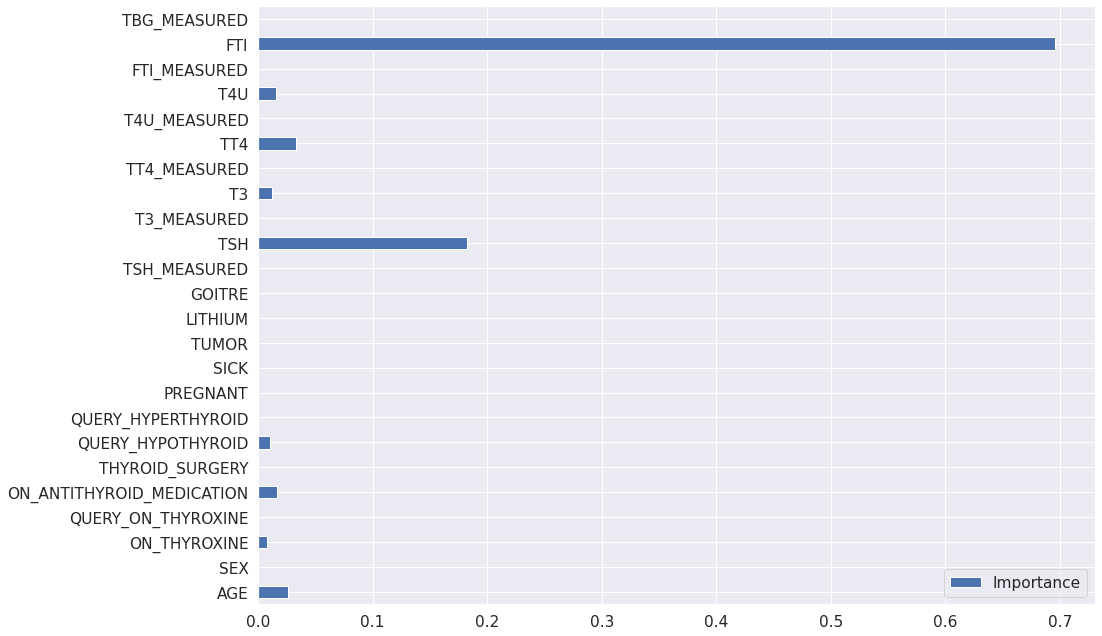

In [308]:
feature=hypothyroidism_df[features]
dfimportance0=pd.DataFrame(dectree.feature_importances_,feature.columns,columns=['Importance'])
dfimportance0.plot(kind='barh',figsize=(15,11))
print(dfimportance0)

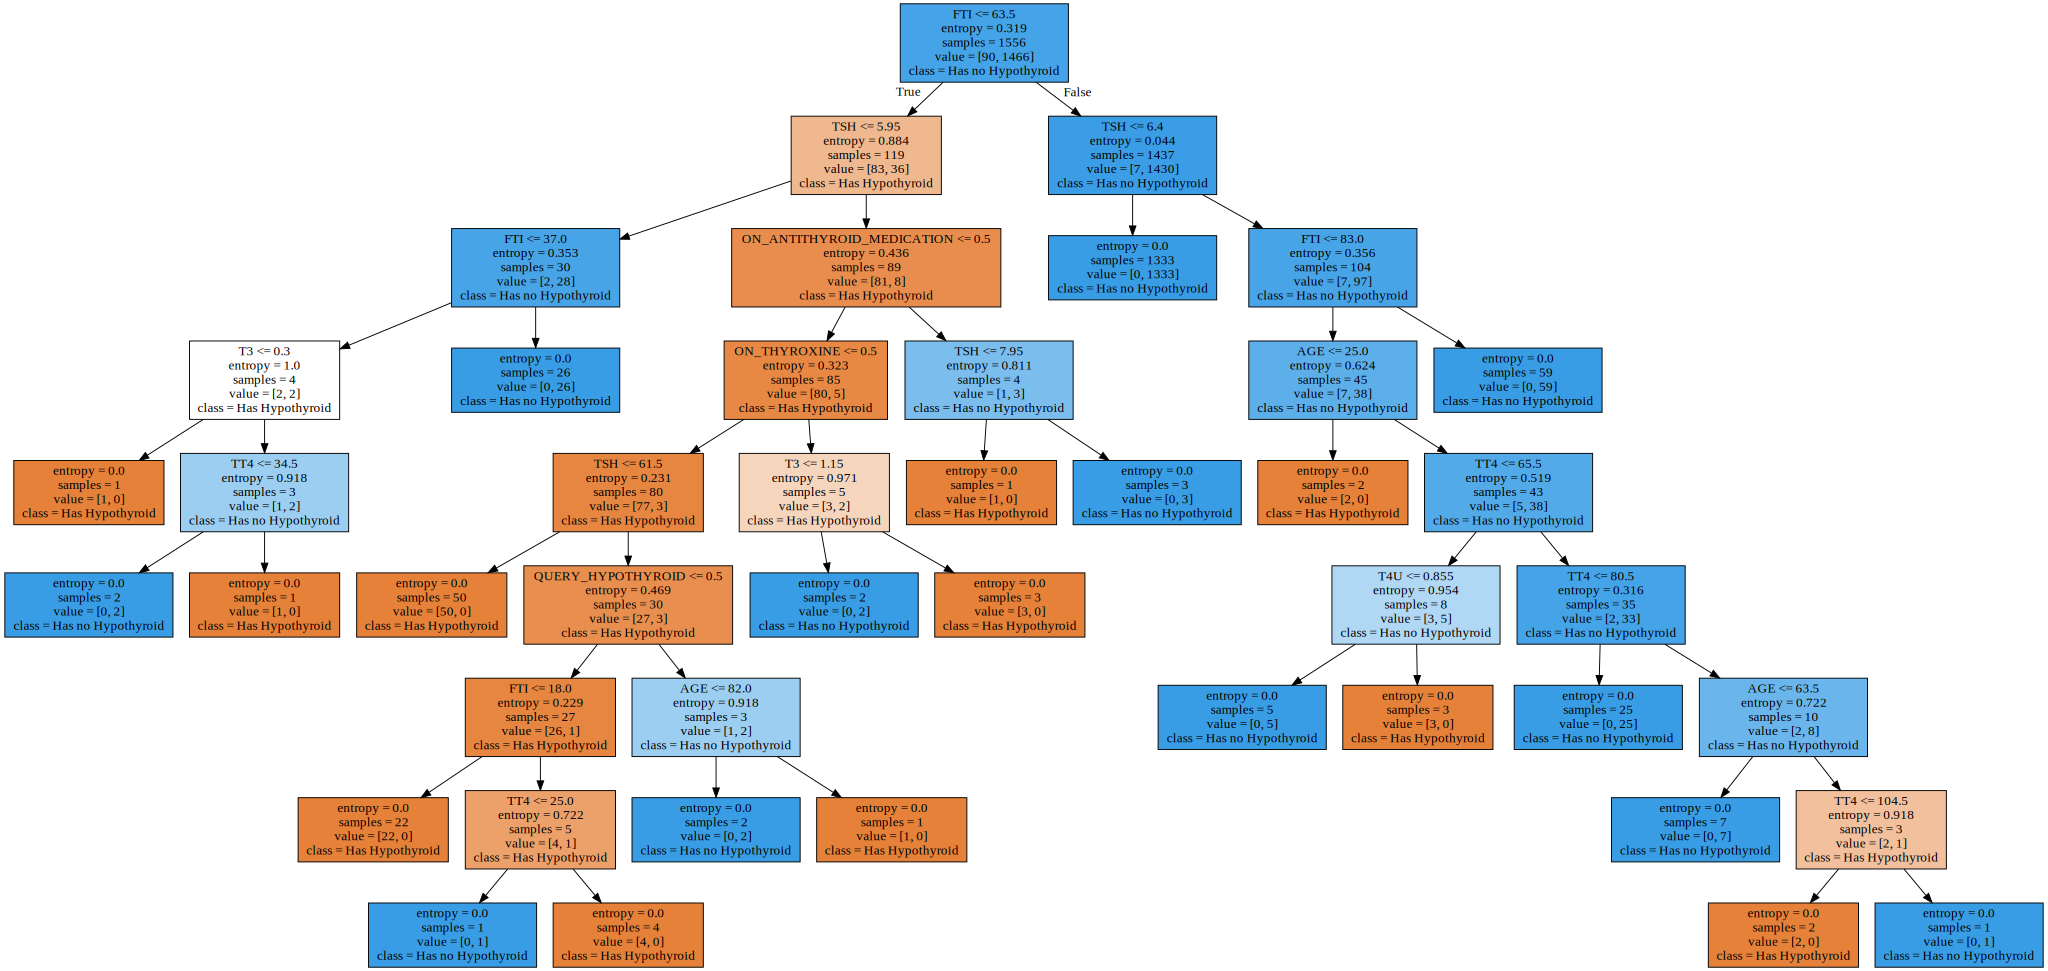

In [270]:
graph=export_graphviz(dectree,feature_names=features,class_names=Class,filled=True)
graph1=graphviz.Source(graph,format='png')
graph1

### **Random Forest**

In [285]:
rtree=RandomForestClassifier(n_estimators=300)
rtree.fit(x_train,ytrain)
ypred1=rtree.predict(xtest)
accuracy1=metrics.accuracy_score(ytest,ypred1)
print('The accuracy of the model is',str(accuracy1 *100),'%')

The accuracy of the model is 88.2051282051282 %


Here the model was built using 300 trees. No max depth or minimum sample splits were defined. the accuracy of the model is 88.21%. Opmimization using this parameters i.e max depth and min sample splits will be used in order to assess whethere the model perfomance will improve

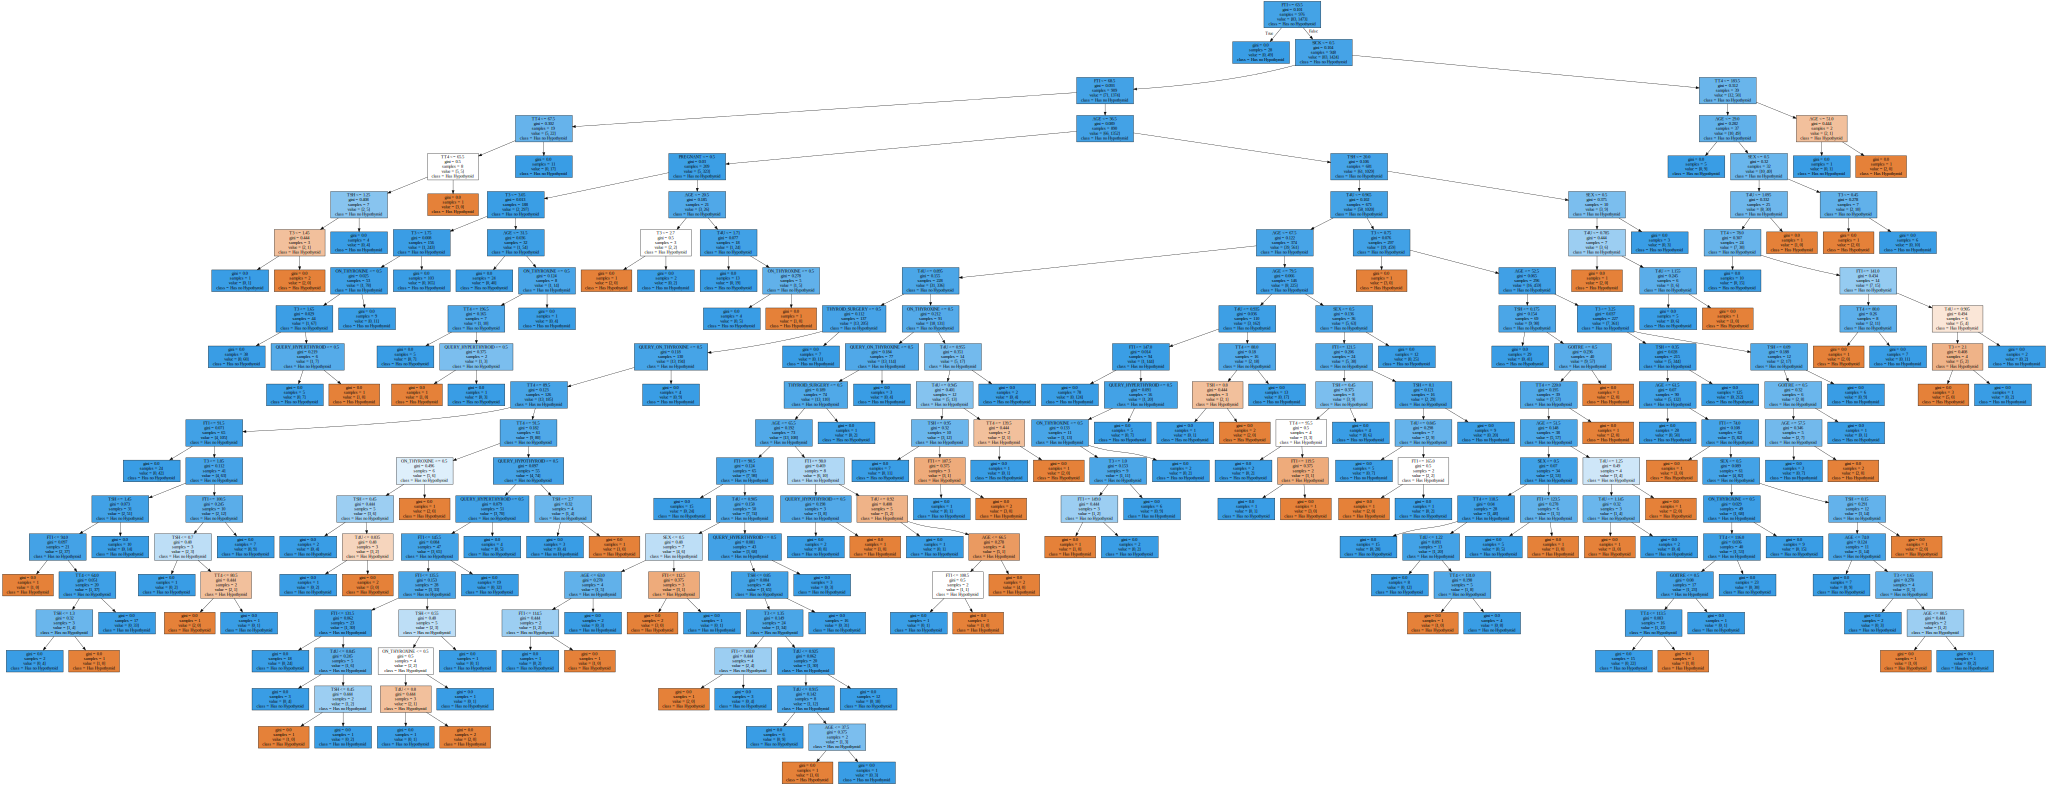

In [286]:
view=rtree.estimators_[60]
graph=export_graphviz(view,feature_names=features,class_names=Class,filled=True)
graph1=graphviz.Source(graph,format='png')
graph1

Random Forest Optimized by introducing max_depth,minimum sample split and reduction of no of trees fro the model

In [287]:
rtree1=RandomForestClassifier(n_estimators=500, max_depth=8,min_samples_split=25)
#500 trees have been used in the forest,a max depth of 8 and minimum sapmle split of 25
rtree1.fit(x_train,ytrain)
ypred2=rtree1.predict(xtest)
accuracy2=metrics.accuracy_score(ytest,ypred2)
print('The accuracy of the model is',str(accuracy2 *100),'%')

The accuracy of the model is 94.1025641025641 %


The accuracy of the model has increased to 94.10% which achives the success metric set

                           Importance
AGE                          0.140421
SEX                          0.014177
ON_THYROXINE                 0.011832
QUERY_ON_THYROXINE           0.001359
ON_ANTITHYROID_MEDICATION    0.037898
THYROID_SURGERY              0.005817
QUERY_HYPOTHYROID            0.010797
QUERY_HYPERTHYROID           0.010051
PREGNANT                     0.008593
SICK                         0.032382
TUMOR                        0.001516
LITHIUM                      0.000075
GOITRE                       0.014914
TSH_MEASURED                 0.000000
TSH                          0.118971
T3_MEASURED                  0.000000
T3                           0.125241
TT4_MEASURED                 0.000000
TT4                          0.138128
T4U_MEASURED                 0.000000
T4U                          0.190145
FTI_MEASURED                 0.000000
FTI                          0.137681
TBG_MEASURED                 0.000000


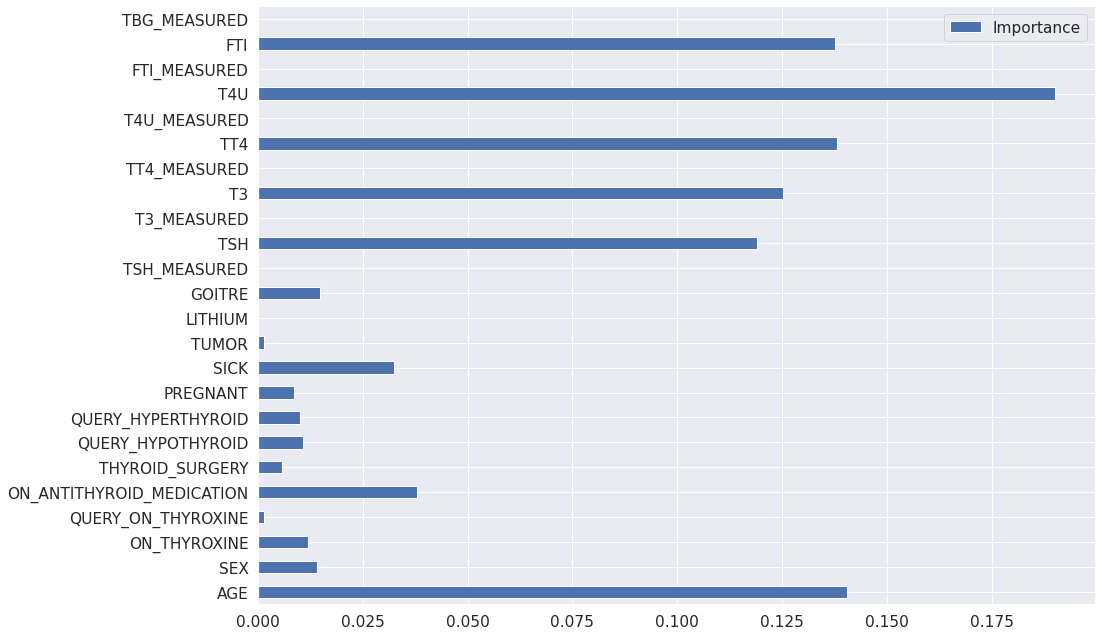

In [289]:
feature=hypothyroidism_df[features]
dfimportance=pd.DataFrame(rtree1.feature_importances_,feature.columns,columns=['Importance'])
dfimportance.plot(kind='barh',figsize=(15,11))
print(dfimportance)

### **Gradient boost**

In [291]:
grboost=GradientBoostingClassifier(n_estimators=300,learning_rate=1)
grboost.fit(xtrain,ytrain)
ypredb=grboost.predict(xtest)
accuracyb=metrics.accuracy_score(ytest,ypredb)
print('The accuracy of the model is',str(accuracyb *100),'%')

The accuracy of the model is 97.94871794871794 %


In [302]:
grboost1=GradientBoostingClassifier(n_estimators=500,learning_rate=0.5,max_depth=5,min_samples_split=35)
grboost1.fit(xtrain,ytrain)
ypredb1=grboost1.predict(xtest)
accuracyb1=metrics.accuracy_score(ytest,ypredb1)
print('The accuracy of the model is',str(accuracyb1 *100),'%')

The accuracy of the model is 97.6923076923077 %


Including the max depth in the gradient boost model only improves the model by 1% and the change of the number of tree used does not seem to matter at all. When minmum sample split of 30is introduced, the model's accuracy drops down to the initial perfomance of 97.95%. Changing the learning rate does not seem to affect the perfomance of the model.

Summary: Only max depth and the introduction of minimum sample splits affect the perfomance of the model but by a small margin

                             Importance
AGE                        2.951468e-02
SEX                        1.103897e-07
ON_THYROXINE               1.585565e-02
QUERY_ON_THYROXINE         0.000000e+00
ON_ANTITHYROID_MEDICATION  2.177134e-02
THYROID_SURGERY            7.575697e-04
QUERY_HYPOTHYROID          3.536428e-03
QUERY_HYPERTHYROID         0.000000e+00
PREGNANT                   0.000000e+00
SICK                       1.200567e-08
TUMOR                      0.000000e+00
LITHIUM                    0.000000e+00
GOITRE                     0.000000e+00
TSH_MEASURED               0.000000e+00
TSH                        2.190900e-01
T3_MEASURED                0.000000e+00
T3                         1.316672e-02
TT4_MEASURED               0.000000e+00
TT4                        2.319671e-02
T4U_MEASURED               0.000000e+00
T4U                        7.840593e-03
FTI_MEASURED               0.000000e+00
FTI                        6.652702e-01
TBG_MEASURED               0.000000e+00


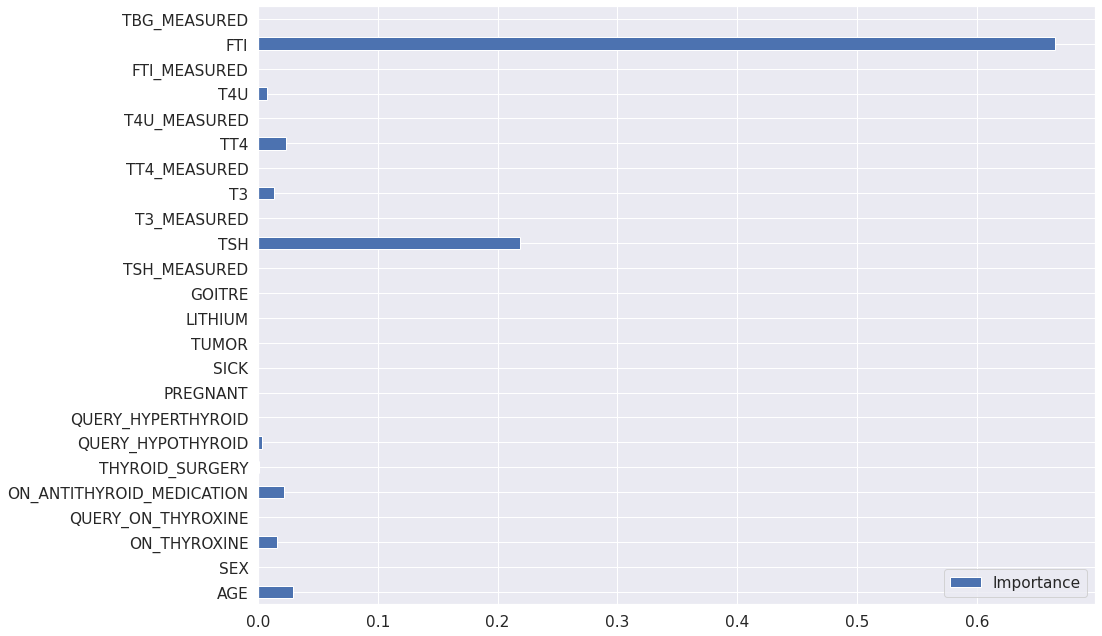

In [303]:
dfimportanceb=pd.DataFrame(grboost.feature_importances_,feature.columns,columns=['Importance'])
dfimportanceb.plot(kind='barh',figsize=(15,11))
print(dfimportanceb)

                             Importance
AGE                        2.761785e-02
SEX                        7.604152e-08
ON_THYROXINE               3.983591e-03
QUERY_ON_THYROXINE         0.000000e+00
ON_ANTITHYROID_MEDICATION  2.250194e-02
THYROID_SURGERY            2.230773e-03
QUERY_HYPOTHYROID          5.666077e-03
QUERY_HYPERTHYROID         0.000000e+00
PREGNANT                   0.000000e+00
SICK                       0.000000e+00
TUMOR                      0.000000e+00
LITHIUM                    0.000000e+00
GOITRE                     2.350187e-07
TSH_MEASURED               0.000000e+00
TSH                        1.919154e-01
T3_MEASURED                0.000000e+00
T3                         2.171339e-03
TT4_MEASURED               0.000000e+00
TT4                        2.913093e-03
T4U_MEASURED               0.000000e+00
T4U                        3.965255e-03
FTI_MEASURED               0.000000e+00
FTI                        7.370344e-01
TBG_MEASURED               0.000000e+00


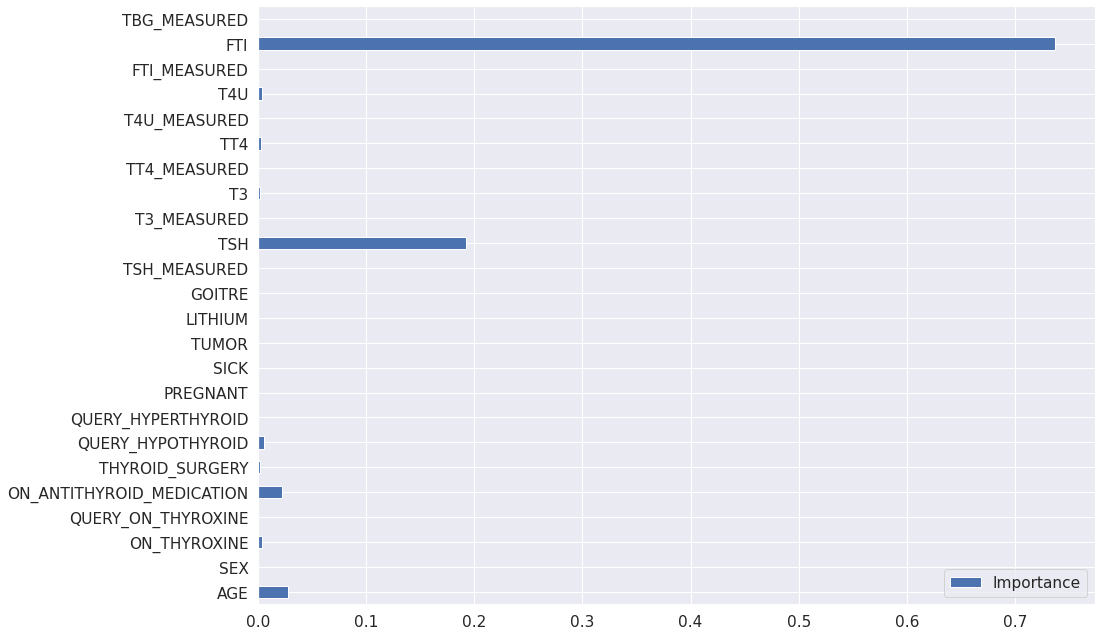

In [304]:
dfimportanceb1=pd.DataFrame(grboost1.feature_importances_,feature.columns,columns=['Importance'])
dfimportanceb1.plot(kind='barh',figsize=(15,11))
print(dfimportanceb1)

**FTI** test results used to diagnose thyroid disorders is the most important feature used by the** gradient boost** to creat the model whilethe **random forest's** most important feature is **T4U** test results

### **Support Vector Machine(SVM)**

The two most important features (FTI,T4U test results)identified in the above will be used for the modeling with svm

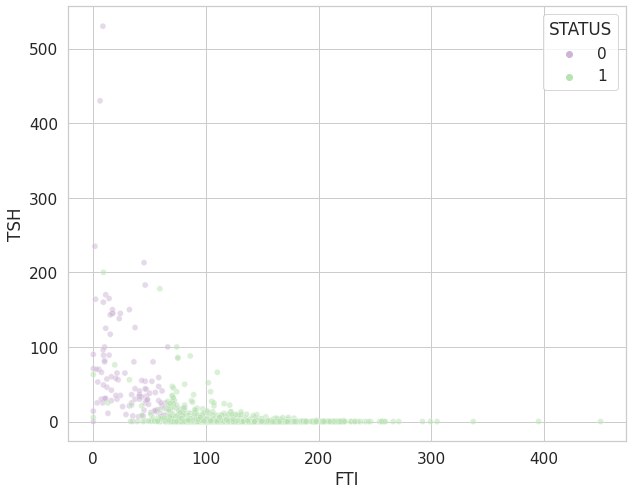

In [363]:
#FTI
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10,8))
ax=sns.scatterplot(x='FTI', y='TSH', hue='STATUS', alpha=0.5, data=hypothyroidism_df, palette='PRGn')


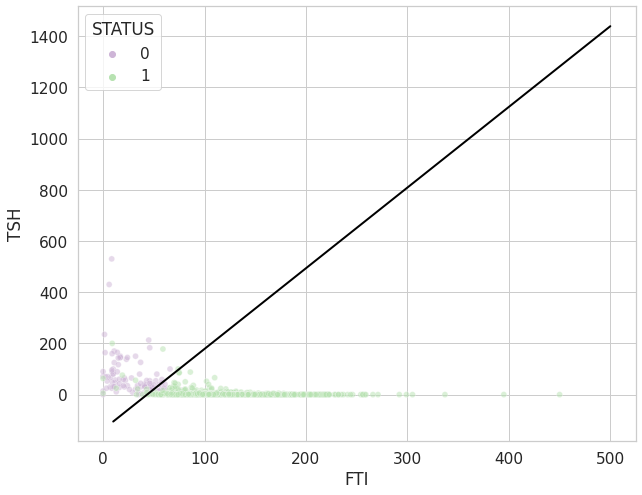

In [377]:
# Get the separating hyperplane
w = model.coef_[0] #get the first coefficient of our model
a = -w[0] / w[1]
xx = np.linspace(10, 500)
yy = a * xx - (model.intercept_[0]) / w[1]
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x='FTI', y='TSH', hue='STATUS', alpha=0.5, data=hypothyroidism_df, palette='PRGn')
plt.plot(xx, yy, linewidth=2, color='black');

**Preparing data for SVM modeling**

In [413]:
x1=hypothyroidism_df[['TSH','T3','TT4','T4U','FTI']]
scaler= StandardScaler()
scaler.fit_transform(x1)
x1=normalize(x1)
x1train,x1test,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

**Kernel=Linear**

In [414]:
svm1 = SVC(kernel= 'linear')
svm1.fit(x1train,ytrain)
predsvm1=svm1.predict(x1test)
accuracysvm1=metrics.accuracy_score(ytest,predsvm1)
print('The accuracy of the model is',str(accuracysvm1 *100),'%')

The accuracy of the model is 97.43589743589743 %


The linear Kernel leads to an a 97.43% accuracy of the model

**Kernel=Polynominal**

In [415]:
svm2 = SVC(kernel='poly')
svm2.fit(x1train,ytrain)
predsvm2=svm1.predict(x1test)
accuracysvm2=metrics.accuracy_score(ytest,predsvm2)
print('The accuracy of the model is',str(accuracysvm2 *100),'%')

The accuracy of the model is 97.43589743589743 %


Creates a model with 97.43% accuracy as well. The change of degree does not affect the accuracy of the model

**Kernel = rbf**

In [426]:
svm3 = SVC(kernel='rbf',gamma='auto',C=7)
svm3.fit(x1train,ytrain)
predsvm3=svm3.predict(x1test)
accuracysvm3=metrics.accuracy_score(ytest,predsvm3)
print('The accuracy of the model is',str(accuracysvm3 *100),'%')

The accuracy of the model is 97.6923076923077 %


### **Conclusion**

In [429]:
conclusiondf=pd.DataFrame({'Model':['Random Forest','Gradient Boosted','SVM_Linear','SVM_Polynominal','SVM_rbf'],
                           'Accuracy_Scores_%':[94.10,97.69,97.43,97.43,97.69]})
conclusiondf

,Model,Accuracy_Scores_%
0,Random Forest,94.10
1,Gradient Boosted,97.69
2,SVM_Linear,97.43
3,SVM_Polynominal,97.43
4,SVM_rbf,97.69


Gradient boosted decision trees and SVM(Kernel=rbf) had the same performance in classifying whether or not a patient had hypothyroidism with a 97.69% accuracy.